In [1]:
#Fast Fourier Transform: magnitude tells you the strength of the frequency components relative
#to other components, phase tells you how all the frequency components align in time

In [2]:
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.image as mpimg
import os, copy, time, pickle
from urllib.request import urlretrieve
import os
import h5py as h5

from Meitz_utils import get_AMP, get_scale, find_amp_index, integrate_model, get_true_pred

In [3]:
def load_data(file):   
    f = h5.File(file, 'r')
    data = np.array(f['Dataset1'][:,:,0:2])
    return data

In [4]:
FILE = 'Trajectories400.hdf5' 
MAJOR_FOLDER = "04062023"

data = load_data(FILE)
print(np.shape(data))

(400, 1000, 2)


FFT tune value for 120
-0.333
0.333


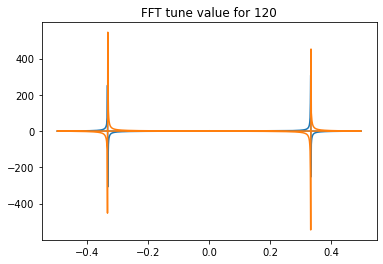

FFT tune value for 121
-0.333
0.333


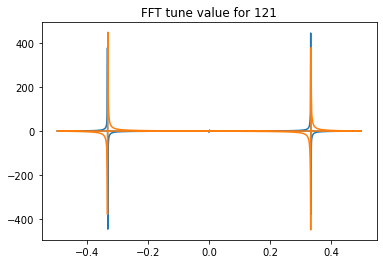

FFT tune value for 122
-0.333
-0.333


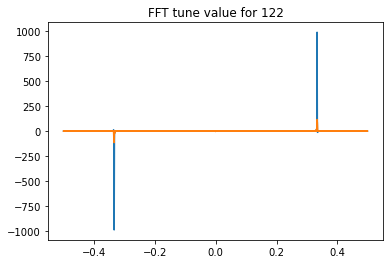

FFT tune value for 123
-0.333
-0.333


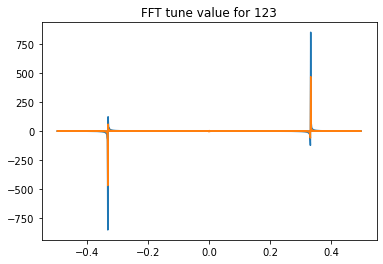

FFT tune value for 124
-0.333
-0.333


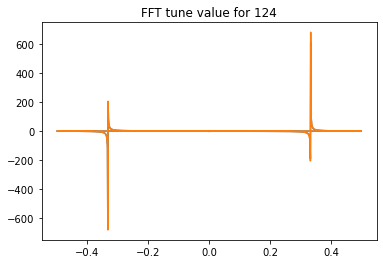

FFT tune value for 125
-0.333
-0.333


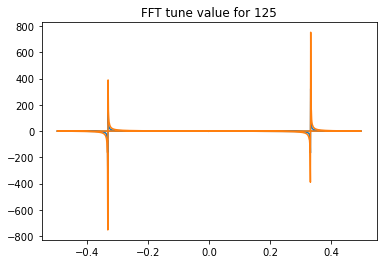

FFT tune value for 126
-0.333
-0.333


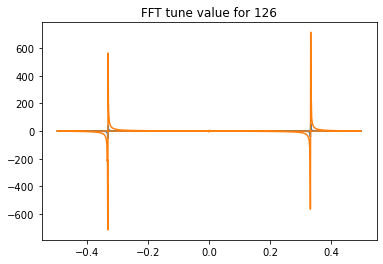

FFT tune value for 127
-0.332
0.332


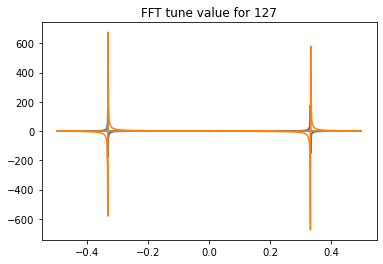

FFT tune value for 128
-0.332
0.332


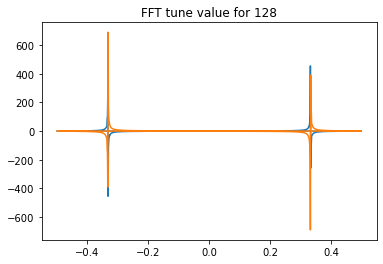

FFT tune value for 129
-0.332
0.332


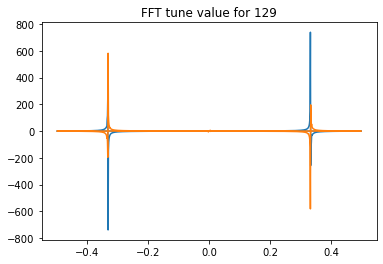

FFT tune value for 130
-0.332
0.332


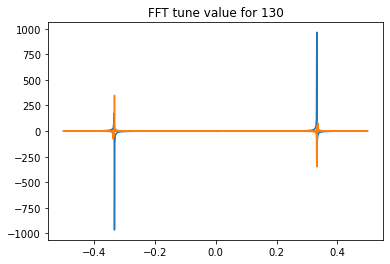

FFT tune value for 131
-0.332
-0.336


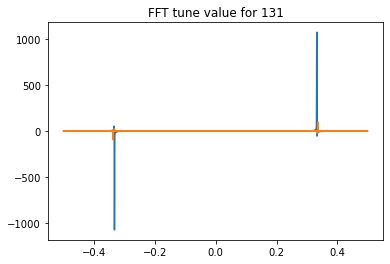

FFT tune value for 132
-0.332
-0.332


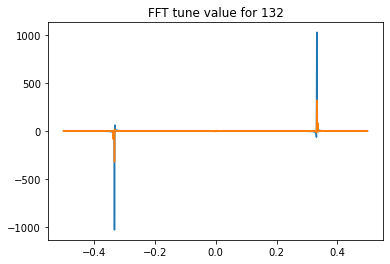

FFT tune value for 133
-0.332
-0.332


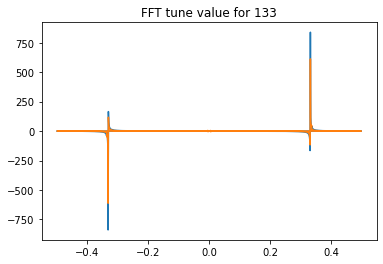

FFT tune value for 134
-0.332
-0.332


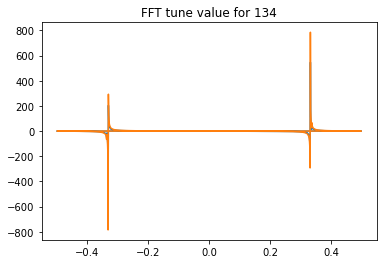

FFT tune value for 135
-0.332
-0.332


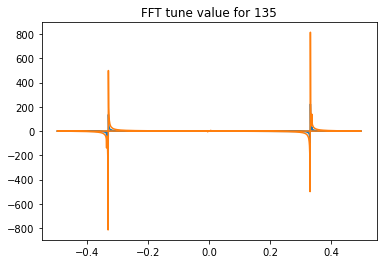

FFT tune value for 136
0.332
-0.332


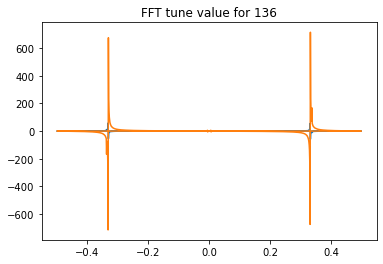

FFT tune value for 137
-0.331
0.331


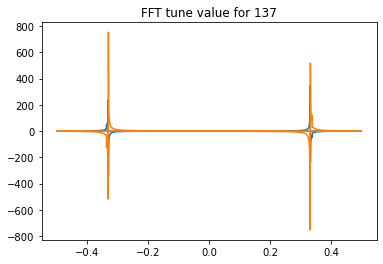

FFT tune value for 138
-0.331
0.331


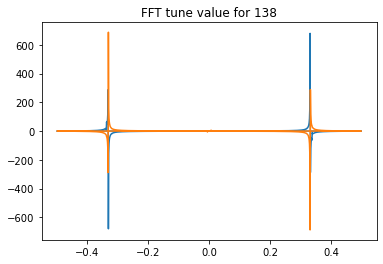

FFT tune value for 139
-0.331
0.331


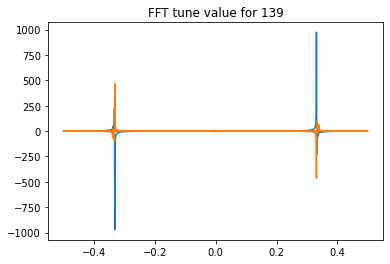

FFT tune value for 140
-0.331
0.331


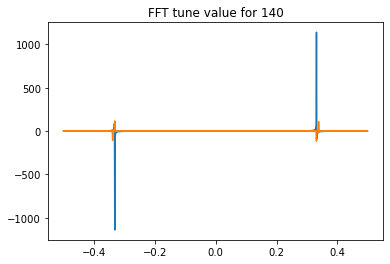

FFT tune value for 141
-0.331
-0.331


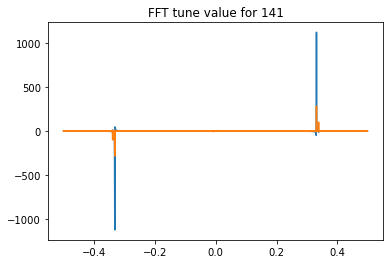

FFT tune value for 142
-0.331
-0.331


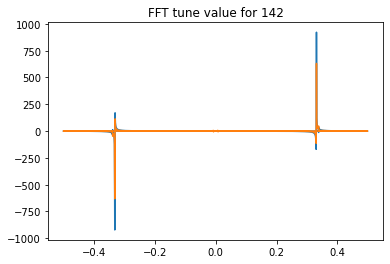

FFT tune value for 143
-0.331
-0.331


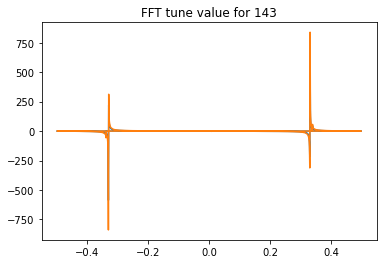

FFT tune value for 144
-0.331
-0.331


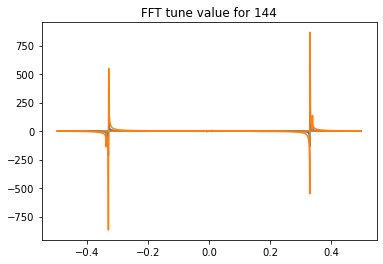

FFT tune value for 145
-0.33
0.33


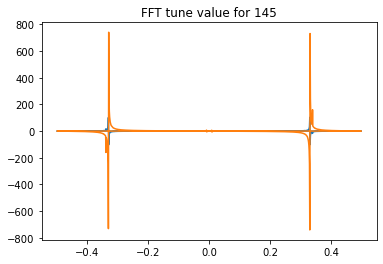

FFT tune value for 146
-0.33
0.33


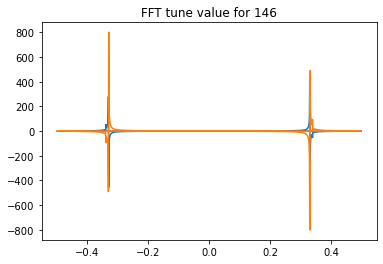

FFT tune value for 147
-0.33
0.33


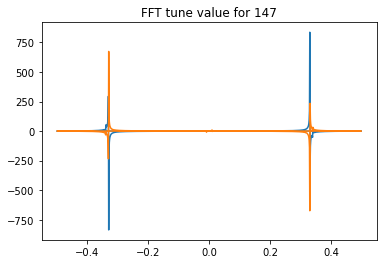

FFT tune value for 148
-0.33
0.33


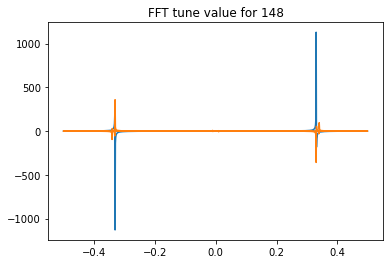

FFT tune value for 149
-0.33
-0.34


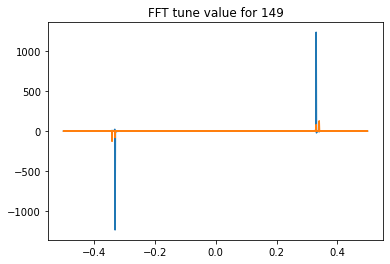

FFT tune value for 150
-0.33
-0.33


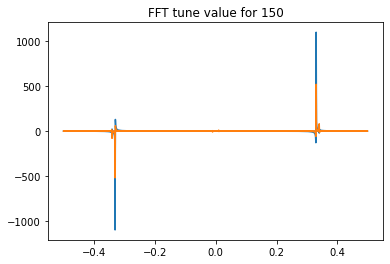

In [9]:
for i in range(120,151): 
    print('FFT tune value for %s' % i)
    xfft = np.fft.fft(data[i,:,0])
    xfreq = np.fft.fftfreq(len(data[i,:,0]))
    plt.title('FFT tune value for %s' % i)
    plt.plot(xfreq, xfft.imag)
    #plt.show()
    print(xfreq[np.argmin(xfft.imag)])

    pxfft = np.fft.fft(data[i,:,1])
    pxfreq = np.fft.fftfreq(len(data[i,:,1]))
    plt.plot(pxfreq, pxfft.imag)
    print(pxfreq[np.argmin(pxfft.imag)])
    
    plt.show()

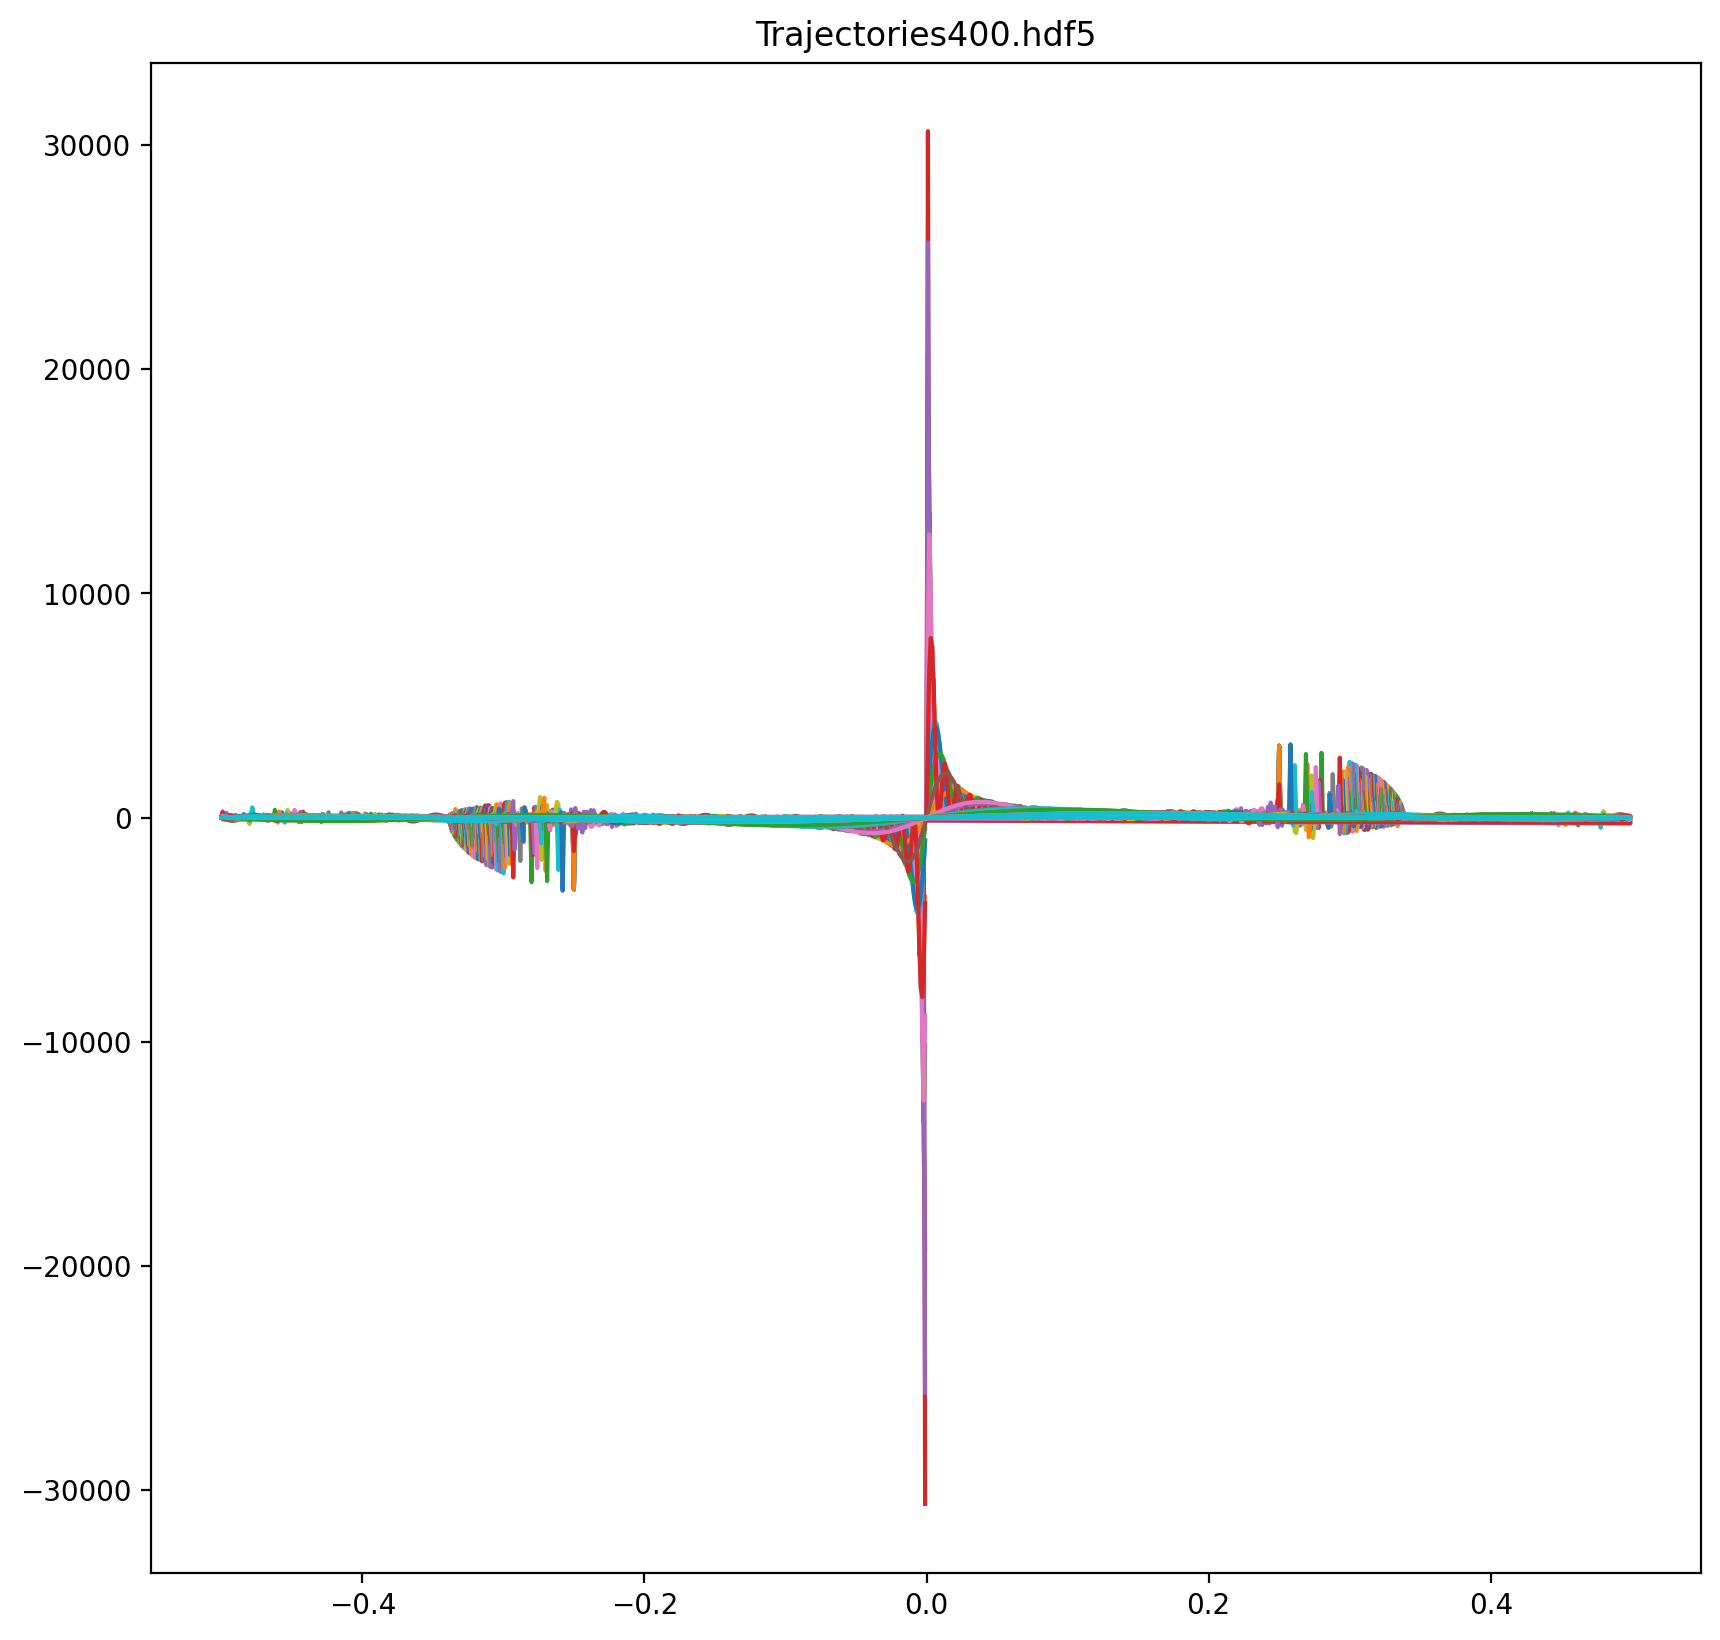

In [6]:
#all FFT on one plot
plt.figure(figsize=[10,10], dpi=200)
for i in range(len(data)): 
    xfft = np.fft.fft(data[i,:,0])
    xfreq = np.fft.fftfreq(len(data[i,:,0]))
    plt.title(FILE)
    plt.plot(xfreq, xfft.imag)
    
    pxfft = np.fft.fft(data[i,:,1])
    pxfreq = np.fft.fftfreq(len(data[i,:,1]))
    #plt.plot(pxfreq, pxfft.imag)
    

plt.savefig(os.path.join("/global/cfs/cdirs/m3792/mmeitz/dissipative_hnns", MAJOR_FOLDER, "All_FFT.png"))

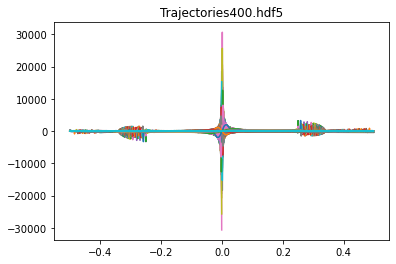

In [7]:
#all FFT on one plot 
for i in range(len(data)): 
    xfft = np.fft.fft(data[i,:,0])
    xfreq = np.fft.fftfreq(len(data[i,:,0]))
    plt.title(FILE)
    plt.plot(xfreq, xfft.imag)
    
    pxfft = np.fft.fft(data[i,:,1])
    pxfreq = np.fft.fftfreq(len(data[i,:,1]))
    plt.plot(pxfreq, pxfft.imag)
    